# InSituPy demonstration - InSituExperiment

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import scanpy as sc
from insitupy import InSituExperiment

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")
xd = read_xenium(insitupy_project)
xd.load_all(skip="transcripts")

Loading annotations...
Loading cells...
	No alternative cells found...
Loading images...
['nuclei', 'CD20', 'HER2', 'DAPI', 'HE']
Loading regions...


In [5]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connec

### Create `InSituExperiment`

#### Method 1: Manually add `InSituData` objects

In [6]:
exp = InSituExperiment()
exp.add(
    data=xd,
    metadata={
        "slide_id": xd.slide_id,
        "sample_id": xd.sample_id,
        "patient": "A"
    }
    )

In [7]:
exp

InSituExperiment with 1 samples:
           uid slide_id    sample_id patient
0     01573964  0001879  Replicate 1       A

In the same way also other datasets can be added. For demonstration purposes, we just add the same dataset again and change the metadata.

In [8]:
exp.add(
    data=xd,
    metadata={
        "slide_id": xd.slide_id,
        "sample_id": xd.sample_id,
        "patient": "A",
        "therapy": "drugB"
    }
    )

In [9]:
exp

InSituExperiment with 2 samples:
           uid slide_id    sample_id patient therapy
0     01573964  0001879  Replicate 1       A     NaN
1     468256f0  0001879  Replicate 1       A   drugB

#### Method 2: From config file

As config file either a csv file or an excel file can be used.

Example of a valid configuration file:

| directory         | experiment_name | date       | patient    |
|-------------------|-----------------|------------|------------|
| /path/to/dataset1 | Experiment 1    | 2023-09-01 | Patient A  |
| /path/to/dataset2 | Experiment 2    | 2023-09-02 | Patient B  |

In [10]:
exp = InSituExperiment.from_config(config_path="./demo_dataset/insituexperiment_config.csv")

In [11]:
exp

InSituExperiment with 2 samples:
           uid slide_id    sample_id patient therapy
0     f7c25b03  0001879  Replicate 1       A   drugA
1     54bd848d  0001879  Replicate 1       B   drugB

#### Method 3: From regions

We can also use regions from an `InSituData` object to split the data into separate datasets and create an `InSituExperiment` from them. This can be used to select the most interesting regions and focus on them for the analysis or to split a TMA dataset into separate datasets for each core.

In [12]:
xd.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


In [13]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connec

In [14]:
exp = InSituExperiment.from_regions(
    data=xd, region_key="TMA"
)

In [15]:
exp

InSituExperiment with 6 samples:
           uid slide_id    sample_id region_key region_name
0     f14b83e1  0001879  Replicate 1        TMA         A-1
1     91130ddf  0001879  Replicate 1        TMA         A-2
2     5624da9f  0001879  Replicate 1        TMA         A-3
3     9a175975  0001879  Replicate 1        TMA         B-1
4     183622a8  0001879  Replicate 1        TMA         B-2
5     387c830a  0001879  Replicate 1        TMA         B-3

In [16]:
exp.show(2)

Viewer(camera=Camera(center=(0.0, 499.90625, 499.8), zoom=0.24783007185383743, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 1000.025, 0.2125), (0.0, 999.8125, 0.2125)), current_step=(2352, 2352), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x25eef57b4f0>, <Image layer 'CD20' at 0x25eef73aa90>, <Image layer 'HER2' at 0x25eb787a0a0>, <Image layer 'DAPI' at 0x25ef4736f40>, <Image layer 'HE' at 0x25ef49cb0d0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='0001879: Replicate 1', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x0000025E7FED4AF0>], _persist

## Plot overview of metadata and QC metrics

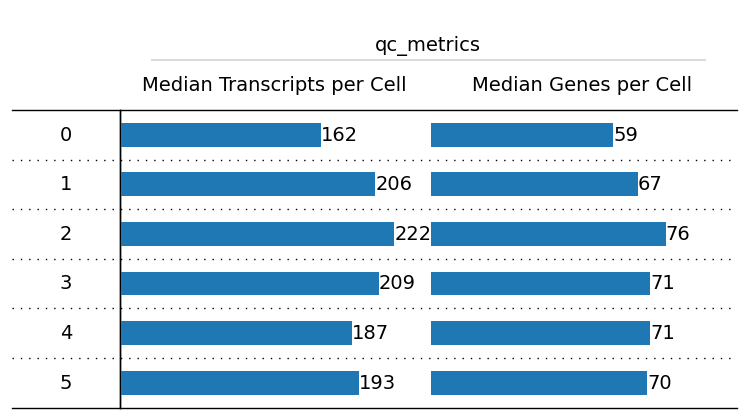

In [17]:
exp.plot_overview()

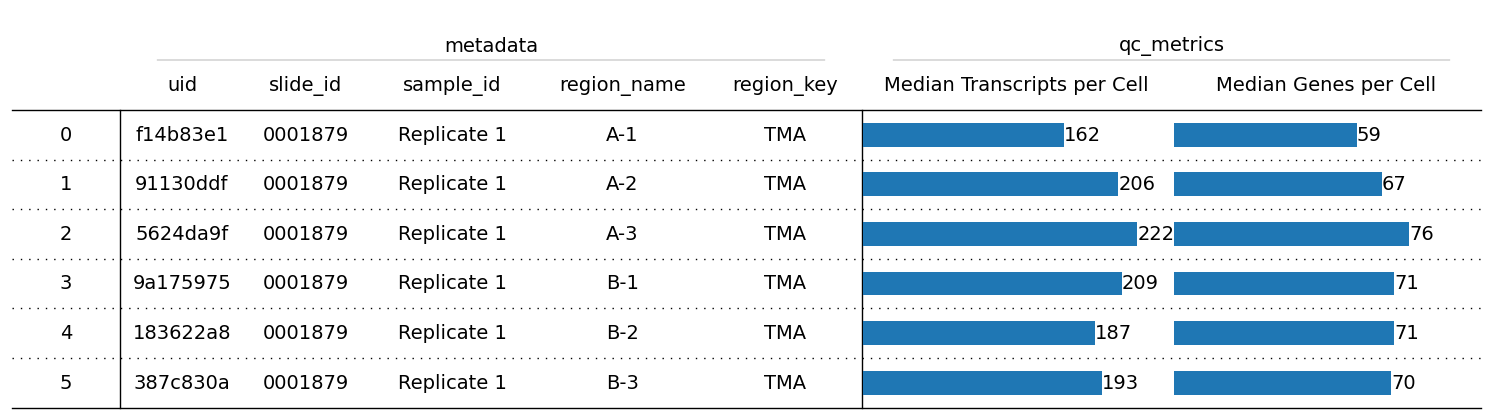

In [18]:
exp.plot_overview(["uid", "slide_id", "sample_id", "region_name", "region_key"], index=True)

## Iterate through `InSituExperiment` using `.iterdata()` method

In [19]:
for metadata, data in exp.iterdata():
    print(f"Metadata:\n{metadata[:3]}\nData:\n{data}")

Metadata:
uid             f14b83e1
slide_id         0001879
sample_id    Replicate 1
Name: 0, dtype: object
Data:
InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(4706, 4706)
       CD20:	(4706, 4706)
       HER2:	(4706, 4706)
       DAPI:	(4706, 4706)
       HE:	(4706, 4706, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 6743 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
           varm: 'OT', 'PCs', 'binn

## Add new metadata

In the following section different scenarios for adding new metadata are shown.

In [20]:
exp1 = InSituExperiment.from_regions(
    data=xd, region_key="demo_regions"
)

In [21]:
exp1

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name
0     b8c621b9  0001879  Replicate 1  demo_regions     Region1
1     f8fd9836  0001879  Replicate 1  demo_regions     Region2
2     f3ef663d  0001879  Replicate 1  demo_regions     Region3

In [31]:
exp2 = exp1.copy()
exp2.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata.csv",
    by="region_name", overwrite=True
)

In [32]:
exp2

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_name therapy   organ      test region_key
0     b8c621b9  0001879  Replicate 1     Region1   drugC   liver  negative       key1
1     f8fd9836  0001879  Replicate 1     Region2   drugD    lung      test       key3
2     f3ef663d  0001879  Replicate 1     Region3   drugE  spleen  positive       key2

In [35]:

exp3 = exp1.copy()
exp3.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata.csv",
    by="region_name", overwrite=False
)

In [36]:
exp3

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name   organ      test therapy
0     b8c621b9  0001879  Replicate 1  demo_regions     Region1   liver  negative   drugC
1     f8fd9836  0001879  Replicate 1  demo_regions     Region2    lung      test   drugD
2     f3ef663d  0001879  Replicate 1  demo_regions     Region3  spleen  positive   drugE

In [37]:
exp4 = exp1.copy()
exp4.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata2.csv",
    by="region_name", overwrite=False
)

In [38]:
exp4

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name   organ      test therapy
0     b8c621b9  0001879  Replicate 1  demo_regions     Region1   liver  negative   drugC
1     f8fd9836  0001879  Replicate 1  demo_regions     Region2     NaN       NaN     NaN
2     f3ef663d  0001879  Replicate 1  demo_regions     Region3  spleen  positive   drugE

In [39]:
exp5 = exp1.copy()
exp5.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata2.csv",
    by="region_name", overwrite=True
)

In [40]:
exp5

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_name therapy   organ      test region_key
0     b8c621b9  0001879  Replicate 1     Region1   drugC   liver  negative       key1
1     f8fd9836  0001879  Replicate 1     Region2     NaN     NaN       NaN        NaN
2     f3ef663d  0001879  Replicate 1     Region3   drugE  spleen  positive       key2

Concatenate multiple `InSituExperiment` objects

In [41]:
exp

InSituExperiment with 6 samples:
           uid slide_id    sample_id region_key region_name
0     f14b83e1  0001879  Replicate 1        TMA         A-1
1     91130ddf  0001879  Replicate 1        TMA         A-2
2     5624da9f  0001879  Replicate 1        TMA         A-3
3     9a175975  0001879  Replicate 1        TMA         B-1
4     183622a8  0001879  Replicate 1        TMA         B-2
5     387c830a  0001879  Replicate 1        TMA         B-3

In [42]:
exp1

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name
0     b8c621b9  0001879  Replicate 1  demo_regions     Region1
1     f8fd9836  0001879  Replicate 1  demo_regions     Region2
2     f3ef663d  0001879  Replicate 1  demo_regions     Region3

In [43]:
exp_concat = InSituExperiment.concat(
    objs={
        "exp_TMA": exp,
        "exp_demo_regions": exp1
    },
    new_col_name="name"
    )

In [44]:
exp_concat

InSituExperiment with 9 samples:
           uid slide_id    sample_id    region_key region_name              name
0     f14b83e1  0001879  Replicate 1           TMA         A-1           exp_TMA
1     91130ddf  0001879  Replicate 1           TMA         A-2           exp_TMA
2     5624da9f  0001879  Replicate 1           TMA         A-3           exp_TMA
3     9a175975  0001879  Replicate 1           TMA         B-1           exp_TMA
4     183622a8  0001879  Replicate 1           TMA         B-2           exp_TMA
5     387c830a  0001879  Replicate 1           TMA         B-3           exp_TMA
6     b8c621b9  0001879  Replicate 1  demo_regions     Region1  exp_demo_regions
7     f8fd9836  0001879  Replicate 1  demo_regions     Region2  exp_demo_regions
8     f3ef663d  0001879  Replicate 1  demo_regions     Region3  exp_demo_regions

In [45]:
exp_concat = InSituExperiment.concat(
    objs=[exp, exp1])

In [46]:
exp_concat

InSituExperiment with 9 samples:
           uid slide_id    sample_id    region_key region_name
0     f14b83e1  0001879  Replicate 1           TMA         A-1
1     91130ddf  0001879  Replicate 1           TMA         A-2
2     5624da9f  0001879  Replicate 1           TMA         A-3
3     9a175975  0001879  Replicate 1           TMA         B-1
4     183622a8  0001879  Replicate 1           TMA         B-2
5     387c830a  0001879  Replicate 1           TMA         B-3
6     b8c621b9  0001879  Replicate 1  demo_regions     Region1
7     f8fd9836  0001879  Replicate 1  demo_regions     Region2
8     f3ef663d  0001879  Replicate 1  demo_regions     Region3